<a href="https://colab.research.google.com/github/GuilhermeDumam/Desafio_petalas_iris/blob/Master/Desafio_Petalas_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # **Desafio das Petalas Iris**

Este desafio consiste em classificar entre distintos tipos de flores, baseados em características moforlógicas. Para sabermos qual tipo de flor que vai ser, vamos utilizar a técnica dos 'vizinhos mais próximos' ou 'K-NN K-Nearest-Neighbors'. 

Vamos separar o notebook em:

* Importação das bibliotecas e datasets
* Limpeza dos dados
* EDA
* Feature engineering
* Modelagem
* Métricas e conclusões.



In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [2]:
iris = sns.load_dataset("iris")

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


* Iris é um gênero de espécies de plantas com flores vistosas.
* As espécies de íris aqui estudadas, **setosa**, **versicolor** e **virginica** compartilham uma cor semelhante: violeta escuro / azul.
* Uma forma de distinguir visualmente as espécies entre elas é através das dimensões das pétalas e sépalas (comprimento e largura).

Existem 4 categorias listadas: "comprimento da sépala (cm)", "largura da sépala (cm)", "comprimento da pétala (cm)" e "largura da pétala (cm)".

Para entender melhor o conjunto de dados, olharemos para a imagem abaixo.

![alttext](https://bishwamittra.github.io/images/imli/iris_dataset.png)

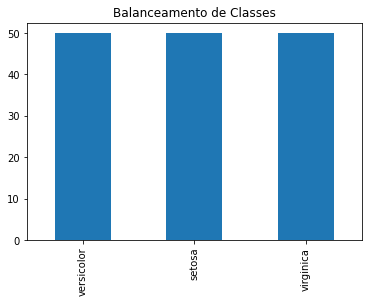

In [ ]:
pd.value_counts(iris.species).plot.bar()
plt.title("Balanceamento de Classes")
plt.show()

In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
## Verificação Nulos
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

###EDA

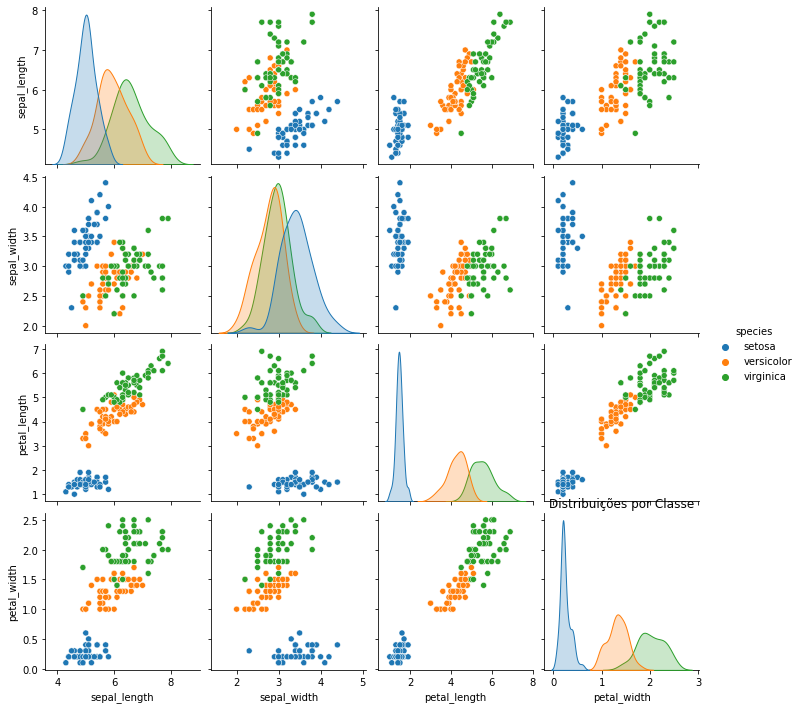

In [ ]:
sns.pairplot(iris, hue="species")
plt.title("Distribuições por Classe")
plt.show()

## Identificação Setosa

Uma forma de distinguir as espécies é analisando suas dimensões pétalas e sépalas e as proporções destas. Junto com uma análise exploratória dos dados é possível obter informações valiosas e algumas conclusões. 

Como visto nos gráficos acima, os dados de **iris-setosa** são muito distintos das outras duas espécies.Para a classificação desta espécie em relação às outras duas, ** basta verificar as dimensões das pétalas**

In [ ]:
iris.groupby("species").agg(["min","max"])

sepal_length      sepal_width  ... petal_length petal_width     
                    min  max         min  ...          max         min  max
species                                   ...                              
setosa              4.3  5.8         2.3  ...          1.9         0.1  0.6
versicolor          4.9  7.0         2.0  ...          5.1         1.0  1.8
virginica           4.9  7.9         2.2  ...          6.9         1.4  2.5

[3 rows x 8 columns]

## Identificação Virginica and Versicolor 

Das outras duas espécies. Os dados de **iris-versicolor** e **iris-virginica**, ao mesmo tempo que são próximos, é notório um valor normal claro para todas as suas dimensões, exceto para a largura da sépala que é quase a mesma para ambas as espécies.

## Classificação KNN


### TRAIN and TEST Data


In [10]:
train, test = train_test_split(iris, test_size=0.2, random_state=42)

In [11]:
X_train = train.drop(labels='species', axis=1)

In [12]:
y_train = train.species

In [13]:
X_test = test.drop(labels='species', axis=1)

In [14]:
y_test = test.species

In [15]:
X_train.shape,X_test.shape

((120, 4), (30, 4))

In [16]:
y_train.shape,y_test.shape

((120,), (30,))

## Otimizando o número de vizinhos K - para o modelo ter um resultado melhor.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knnt = KNeighborsClassifier(n_neighbors=3, p=1)

In [29]:
knnt.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3, p=1)

In [30]:
# Vamos definir um range de 1 a 30 vizinhos
k_list = list(range(1,31))

In [31]:
grid_params = {
    "n_neighbors": k_list,
    "metric": ["minkowski", "euclidian", "manhattan"]
}

### Grid Search

In [32]:
grid = GridSearchCV(knnt, grid_params, cv=5, scoring='accuracy')

In [33]:
grid.fit(train.drop('species', axis=1), train.species)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/n

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3, p=1),
             param_grid={'metric': ['minkowski', 'euclidian', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

### Avaliando Otimização

In [34]:
grid.cv_results_
grid_table = pd.DataFrame(grid.cv_results_)
grid_table.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004227,0.003048,0.003228,0.000398,minkowski,1,"{'metric': 'minkowski', 'n_neighbors': 1}",0.958333,0.958333,0.875000,1.0,0.958333,0.950000,0.040825,7
1,0.002113,0.000025,0.002832,0.000040,minkowski,2,"{'metric': 'minkowski', 'n_neighbors': 2}",0.916667,0.916667,0.875000,1.0,0.916667,0.925000,0.040825,45
2,0.002639,0.000452,0.004460,0.000863,minkowski,3,"{'metric': 'minkowski', 'n_neighbors': 3}",0.958333,1.000000,0.875000,1.0,0.958333,0.958333,0.045644,3
3,0.002981,0.000267,0.005009,0.000363,minkowski,4,"{'metric': 'minkowski', 'n_neighbors': 4}",0.958333,0.958333,0.875000,1.0,0.958333,0.950000,0.040825,7
4,0.003231,0.000727,0.005020,0.000511,minkowski,5,"{'metric': 'minkowski', 'n_neighbors': 5}",0.958333,0.958333,0.833333,1.0,0.958333,0.941667,0.056519,31


In [35]:
grid.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 14,
 'p': 1,
 'weights': 'uniform'}

### Vizualização do número de (k)vizinhos que melhor terá resultado no modelo. 

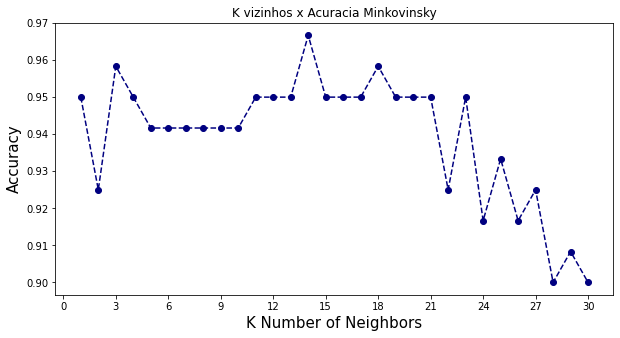

In [36]:
graphic = grid.cv_results_['mean_test_score']

plt.figure(figsize=(10,5))
plt.plot(k_list,graphic[:len(k_list)],color='navy',linestyle='dashed',marker='o')
plt.xlabel('K Number of Neighbors', fontdict={'fontsize': 15})
plt.ylabel('Accuracy', fontdict={'fontsize': 15})
plt.title('K vizinhos x Acuracia Minkovinsky')
plt.xticks(range(0,31,3),)
plt.show()

## Instanciando o Algoritmo KNN

Como já foi realizado o GridSearch para buscarmos os melhores hiperparâmetros para nosso modelo, podemos instanciá-lo com os recomendados.


In [38]:
knn = KNeighborsClassifier(n_neighbors=14, p=1)

In [39]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14, p=1)

Antes de prever os resultados, é possível ter a accuracia média da estimativa nos dados de teste fornecidos.

In [40]:
knn.score(X_test,y_test)

1.0

In [41]:
y_pred = knn.predict(X_test)

## Matriz de Confusão

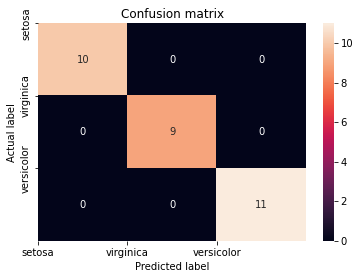

In [42]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
ax = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='g')

class_names=['setosa', 'virginica', 'versicolor']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

> ## Avaliando o modelo a partir das métricas.


Com as **Métricas**, a **precision** calculada e **recall** de cada espécie é mostrada em apresentação tabular.

A **f1-score** representa uma média ponderada entre essas duas métricas. Esta é uma ótima métrica para não levar em consideração os negativos True que geralmente são irrelevantes para os resultados.

A precisão mostra a fidelidade do algoritmo em geral.


Resumo de Métricas


![img](https://www.researchgate.net/publication/325567208/figure/tbl4/AS:668664739151911@1536433505975/Classification-performance-metrics-based-on-the-confusion-matrix.png)

In [43]:
print(metrics.classification_report(y_test,y_pred,target_names=iris.species.unique(), digits=3))

              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        10
  versicolor      1.000     1.000     1.000         9
   virginica      1.000     1.000     1.000        11

    accuracy                          1.000        30
   macro avg      1.000     1.000     1.000        30
weighted avg      1.000     1.000     1.000        30



## Cross Validation e Learning curve

Vamos usar o método do cross validation e printarmos a curva de aprendizagem do modelo para podermos inferir se ele está com problemas de overfitting, pois as métricas deram todas 100%.

In [44]:
from sklearn.model_selection import cross_val_score

In [49]:
scores = cross_val_score(knn, iris.drop('species',axis=1), iris.species, cv=5, scoring='accuracy')
scores

array([0.96666667, 1.        , 0.96666667, 0.93333333, 1.        ])

In [50]:
print(f"Acuracia Média {scores.mean()*100:.2f}% +/- {scores.std()*100:.2f}%")

Acuracia Média 97.33% +/- 2.49%


In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

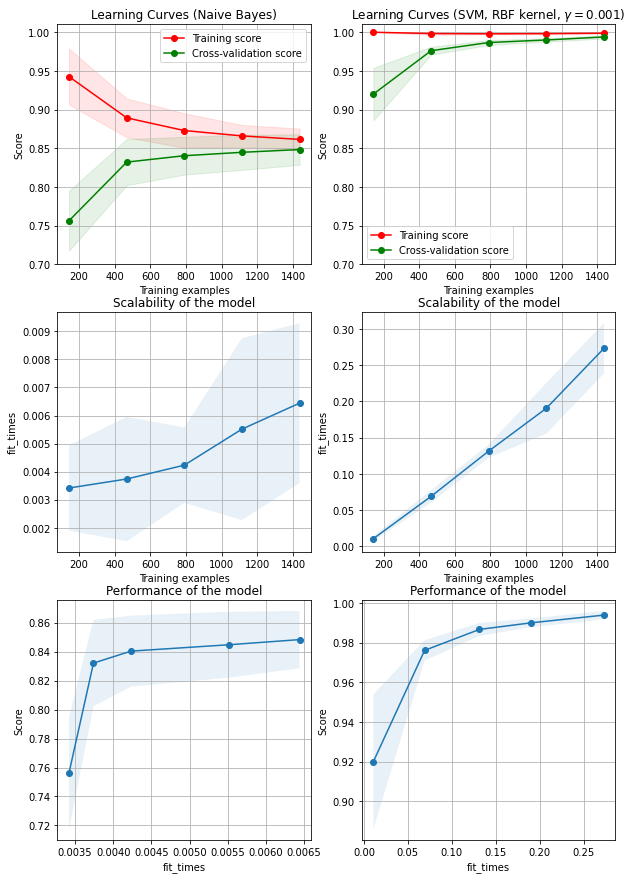

In [48]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

X, y = load_digits(return_X_y=True)

title = "Learning Curves (Naive Bayes)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()


## Conclusão

Aqui temos um modelo com perfomance "perfeita". Isso faz a gente ligar o sinal de alerta para saber se o modelo está sofrendo algum problema de overfitting, e de acordo com nossa curva de aprendizagem e exploração dos dados, ficou constatado que não, esse é mais um caso de conjunto de dados bem distribuídos, e hiperparâmetros bem definidos. 

Concluimos que este modelo está apto para identificar novas plantas nesse universo da botânica. 